# Data Visualization

In [1]:
import numpy as np
import seaborn
import matplotlib.pyplot as plt

In [2]:
# Define input data
X_data_orig = np.arange(100, step=.1)
y_data_orig = 2 * X_data_orig + 20 * np.sin(X_data_orig / 10)

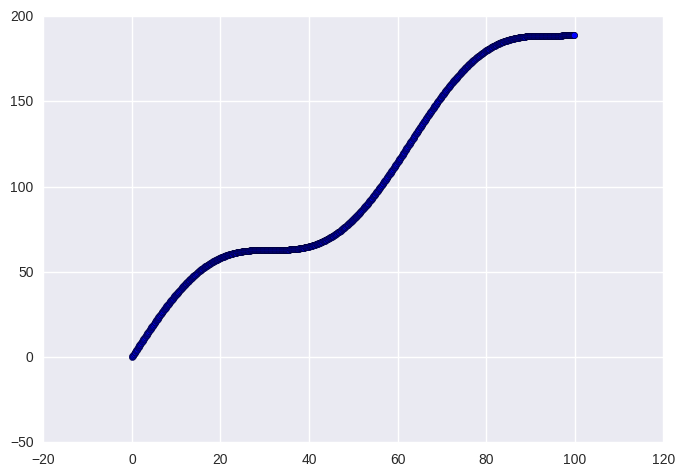

In [3]:
# Plot input data
plt.scatter(X_data_orig, y_data_orig)
plt.show()

# Setup

In [4]:
import tensorflow as tf

In [5]:
# Define data size and batch size
n_samples = 1000
batch_size = 100

In [6]:
X_data_orig.shape

(1000,)

In [7]:
# Tensorflow is finicky about shapes, so resize
X_data = np.reshape(X_data_orig, (n_samples,1))
y_data = np.reshape(y_data_orig, (n_samples,1))

In [8]:
X_data.shape

(1000, 1)

In [9]:
# Define placeholders for input
X = tf.placeholder(tf.float32, shape=(batch_size, 1))
y = tf.placeholder(tf.float32, shape=(batch_size, 1)) 

# Loss

In [10]:
# Define variables to be learned
with tf.variable_scope("linear-regression"):
    W = tf.get_variable("weights", (1, 1), initializer=tf.random_normal_initializer())
    b = tf.get_variable("bias", (1,), initializer=tf.constant_initializer(0.0))
    y_pred = tf.matmul(X, W) + b
    loss = tf.reduce_sum((y - y_pred)**2 / batch_size)

In [11]:
print(loss)

Tensor("linear-regression/Sum:0", shape=(), dtype=float32)


# Optimization

In [12]:
opt = tf.train.AdamOptimizer()
opt_operation = opt.minimize(loss)

In [13]:
with tf.Session() as sess:
    # Initialize Variables in graph
    sess.run(tf.global_variables_initializer())
 
    # Gradient descent loop for 500 steps
    for iloop in range(500):
        # Select random minibatch
        indices = np.random.choice(n_samples, batch_size)
        X_batch, y_batch = X_data[indices], y_data[indices]
 
        # Do gradient descent step
        _, loss_val = sess.run([opt_operation, loss], feed_dict={X: X_batch, y: y_batch})
        print("{0},{1}".format(iloop, loss_val))   
        
    print("{0}".format(loss_val))
    W_np = sess.run(W)
    b_np = sess.run(b)

0,2592.027099609375
1,2746.31396484375
2,2883.228515625
3,2601.2490234375
4,2590.259033203125
5,2500.719482421875
6,2383.140380859375
7,2606.800537109375
8,2764.5498046875
9,2927.833984375
10,2286.773193359375
11,2860.71240234375
12,2859.0595703125
13,3256.169189453125
14,2556.731689453125
15,2540.386474609375
16,2820.3671875
17,2679.13671875
18,2676.046630859375
19,2718.030517578125
20,2715.46044921875
21,2262.0673828125
22,2194.141357421875
23,2465.4248046875
24,3008.172119140625
25,2815.315673828125
26,2823.13232421875
27,2773.66455078125
28,2450.80810546875
29,2504.486572265625
30,2379.336669921875
31,2552.6328125
32,2583.0849609375
33,2372.33837890625
34,2670.126220703125
35,2268.368896484375
36,2863.18115234375
37,2531.943115234375
38,2534.337158203125
39,2571.929443359375
40,2576.42236328125
41,2239.21044921875
42,2361.753662109375
43,2932.85400390625
44,2400.961669921875
45,2296.12548828125
46,2360.496337890625
47,2072.106201171875
48,2565.171875
49,2240.2060546875
50,2731.1691

In [14]:
print(W_np)
print(b_np)

[[ 1.5973444]]
[ 0.43105549]


1.5973443984985352,0.43105548620224


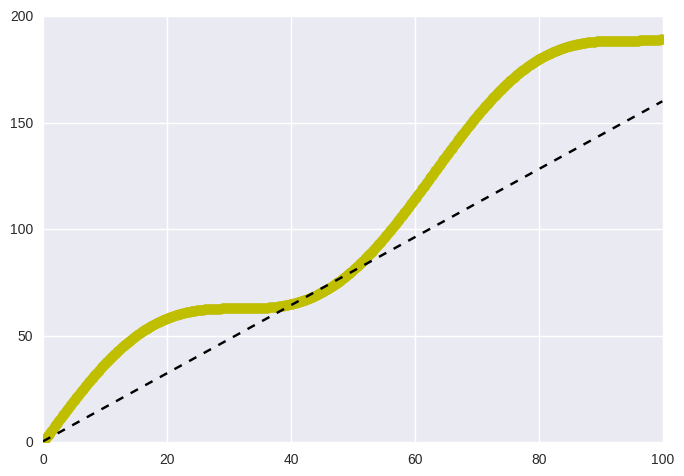

In [15]:
W_plot = W_np.reshape(1,)[0]
b_plot = b_np.reshape(1,)[0]

print("{0},{1}".format(W_plot, b_plot))

fit = np.array([W_plot, b_plot])
fit_fn = np.poly1d(fit) 

plt.plot(X_data_orig, y_data_orig, 'yo', X_data_orig, fit_fn(X_data_orig), '--k')
plt.show()